In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Get the all_hotels dataset from this link: https://drive.google.com/file/d/1A4xz_dILkVvBkyamQDdP7Mt_m_6LqSO8/view?usp=sharing
all_hotels = pd.read_csv("/content/gdrive/MyDrive/AI/datasets/project dataset/train_set.csv", names=["image_id", "hotel_id", "image_url", "image_source", "upload_timestamp"])
# Displaying the dataset
all_hotels.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


In [ ]:
# Getting a subset of all_hotels containing 170k rows
hotels_170k = all_hotels[:170000]

In [ ]:
 # Opening the file containing the serial numbers of the missing images in read mode.
 # View the file by clicking on this link: https://drive.google.com/file/d/1irsjiJfvqF3zrZJ0by1a_0iLfYEUAqdD/view?usp=sharing
file_object = open('/content/gdrive/MyDrive/AI/Missing Images/missing_images_till_170k.txt', 'r')

In [ ]:
# Storing the missing images in a list from the text file
missing_images_string = [word.strip() for line in file_object.readlines() for word in line.split(', ') if word.strip()]

In [ ]:
# Converting the missing images in string format to integers
missing_images = []
for x in missing_images_string:
  try:
    missing_images.append(int(x))
  except:
    print(x)

﻿85509


We noticed that there was an exception in converting the string '85509' into an integer. We suspect that this was because of some whitespace or new line character. Hence, we decided to add this number manually.

In [ ]:
missing_images.append(85509)

In [ ]:
serial_numbers = [i for i in range(170000)]

In [ ]:
# Adding serial number column to hotels_170k dataset.
# These serial numbers correspond to the serial number of the images in the drive.

hotels_170k['serial_number'] = serial_numbers

In [ ]:
# Displaying the hotels_170k dataset
hotels_170k.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,0
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,1
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4


In [ ]:
# Creating a blank dataframe. We will populate it later with only the valid entries (with no missing images) 
# from the hotels_170k subset
hotels = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number'])

In [ ]:
hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number


In [ ]:
# Populating the hotels dataset
for i in range(0, len(hotels_170k['hotel_id'])):
  if hotels_170k['serial_number'][i] not in missing_images:
    hotels.loc[len(hotels)] = [hotels_170k['image_id'][i], hotels_170k['hotel_id'][i],
                                       hotels_170k['image_url'][i], hotels_170k['image_source'][i],
                                       hotels_170k['upload_timestamp'][i], hotels_170k['serial_number'][i]] 

In [ ]:
# Displaying the hotels dataset
hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,0
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,1
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4
...,...,...,...,...,...,...
160048,7057086,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169994
160049,7057087,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169995
160050,7057088,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169996
160051,7057089,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169997


We created a dataframe with two columns
*  hotel_id
*  Count of the number of images corresponding to that hotel_id

We sorted the dataframe in descending order of the count. 

In [ ]:
hotels_id_dist = pd.DataFrame(hotels['hotel_id'].value_counts()).reset_index()

In [ ]:
# Renaming the columns of the dataframe
hotels_id_dist.rename(columns={'index': 'hotel_id', 'hotel_id': 'count'}, inplace=True)

In [ ]:
# Displaying the dataframe
hotels_id_dist

,hotel_id,count
0,6798,328
1,1240,260
2,873,244
3,5201,166
4,6611,165
...,...,...
15315,12080,1
15316,12068,1
15317,12064,1
15318,26906,1


In [ ]:
# Getting the top 50 classes with the most number of images from the dataframe
top_50_hotels_dist = hotels_id_dist['hotel_id'][:50]

In [ ]:
top_50_hotels_dist = list(top_50_hotels_dist)

In [ ]:
# Creating a blank dataframe. We will populate it with 
# all the information corresponding to the top 50 classes.

top_50_hotels = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number'])

In [ ]:
for i in range(0, len(hotels['hotel_id'])):
  try:
    if hotels['hotel_id'][i] in top_50_hotels_dist:
      top_50_hotels.loc[len(top_50_hotels)] = [hotels['image_id'][i], hotels['hotel_id'][i],
                                               hotels['image_url'][i], hotels['image_source'][i],
                                               hotels['upload_timestamp'][i], hotels['serial_number'][i]] 
  except:
    print(i)

In [ ]:
top_50_hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,2603768,6111,https://traffickcam.com/images/2017/7/20160630...,traffickcam,6/30/16 10:01,3152
1,2603769,6111,https://traffickcam.com/images/2017/7/20160630...,traffickcam,6/30/16 10:01,3153
2,2626781,1719,https://traffickcam.com/images/2017/8/20160723...,traffickcam,7/23/16 20:55,7463
3,2628735,4656,https://traffickcam.com/images/2017/8/20160726...,traffickcam,7/26/16 18:36,7869
4,2628736,4656,https://traffickcam.com/images/2017/8/20160726...,traffickcam,7/26/16 18:36,7870
...,...,...,...,...,...,...
6125,7412172,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169984
6126,7412173,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169985
6127,7412174,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169986
6128,7412175,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169987


In [ ]:
# Label encoding the hotel_id column and storing the labels in the new_hotel_id column
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
top_50_hotels['new_hotel_id'] = label_encoder.fit_transform(top_50_hotels['hotel_id'])
top_50_hotels.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2603768,6111,https://traffickcam.com/images/2017/7/20160630...,traffickcam,6/30/16 10:01,3152,38
1,2603769,6111,https://traffickcam.com/images/2017/7/20160630...,traffickcam,6/30/16 10:01,3153,38
2,2626781,1719,https://traffickcam.com/images/2017/8/20160723...,traffickcam,7/23/16 20:55,7463,9
3,2628735,4656,https://traffickcam.com/images/2017/8/20160726...,traffickcam,7/26/16 18:36,7869,30
4,2628736,4656,https://traffickcam.com/images/2017/8/20160726...,traffickcam,7/26/16 18:36,7870,30


In [ ]:
# Getting 20 percent of the data from the dataset using startified sampling.
top_50_hotels_20perc = top_50_hotels.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.2))

In [ ]:
top_50_hotels_20perc

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
66,6503470,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:46:22,45044,0
72,6503476,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:46:22,45050,0
97,6503524,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45075,0
140,6503567,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45118,0
114,6503541,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45092,0
...,...,...,...,...,...,...,...
6054,7412101,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169913,49
6041,7412088,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169900,49
6097,7412144,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169956,49
6082,7412129,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169941,49


In [ ]:
# Storing 50 percent of 20 percent of the hotels_top_50 dataset to create validation subset (total 10% of the original dataset)
top_50_hotels_validation = top_50_hotels_20perc.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [ ]:
top_50_hotels_validation

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
82,6503486,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:46:22,45060,0
138,6503565,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45116,0
141,6503568,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45119,0
61,6503465,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:46:22,45039,0
145,6503572,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45123,0
...,...,...,...,...,...,...,...
6071,7412118,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169930,49
6066,7412113,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169925,49
6082,7412129,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169941,49
6052,7412099,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169911,49


In [ ]:
# Creating a blank dataframe for the testing dataset. This dataframe will be populated with the remaining data 
# from the 20 per cent dataset which was not in the validation subset.
top_50_hotels_test = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
top_50_hotels_test

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id


In [ ]:
for i in range(0, len(top_50_hotels_20perc['hotel_id'])):
    if top_50_hotels_20perc.iloc[i]['serial_number'] not in list(top_50_hotels_validation['serial_number']):
      top_50_hotels_test.loc[len(top_50_hotels_test)] = [top_50_hotels_20perc.iloc[i]['image_id'], top_50_hotels_20perc.iloc[i]['hotel_id'],
                                                        top_50_hotels_20perc.iloc[i]['image_url'], top_50_hotels_20perc.iloc[i]['image_source'],
                                                        top_50_hotels_20perc.iloc[i]['upload_timestamp'], top_50_hotels_20perc.iloc[i]['serial_number'],
                                                        top_50_hotels_20perc.iloc[i]['new_hotel_id']]

In [ ]:
top_50_hotels_test

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,6503476,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:46:22,45050,0
1,6503541,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45092,0
2,6503549,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:48:09,45100,0
3,6503488,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:46:22,45062,0
4,6503487,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,2019-12-19 6:46:22,45061,0
...,...,...,...,...,...,...,...
609,7412091,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169903,49
610,7412153,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169965,49
611,7412145,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169957,49
612,7412101,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169913,49


In [ ]:
# Creating a blank dataframe for the training dataset. This will be populated with 80% of the data in the hotels_top_50 dataset.
top_50_hotels_train = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
top_50_hotels_train

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id


In [ ]:
for i in range(0, len(top_50_hotels['hotel_id'])):
    if top_50_hotels.iloc[i]['serial_number'] not in list(top_50_hotels_20perc['serial_number']):
      top_50_hotels_train.loc[len(top_50_hotels_train)] = [top_50_hotels.iloc[i]['image_id'], top_50_hotels.iloc[i]['hotel_id'],
                                                           top_50_hotels.iloc[i]['image_url'], top_50_hotels.iloc[i]['image_source'],
                                                           top_50_hotels.iloc[i]['upload_timestamp'], top_50_hotels.iloc[i]['serial_number'],
                                                           top_50_hotels.iloc[i]['new_hotel_id']]

In [ ]:
top_50_hotels_train

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2603768,6111,https://traffickcam.com/images/2017/7/20160630...,traffickcam,6/30/16 10:01,3152,38
1,2603769,6111,https://traffickcam.com/images/2017/7/20160630...,traffickcam,6/30/16 10:01,3153,38
2,2626781,1719,https://traffickcam.com/images/2017/8/20160723...,traffickcam,7/23/16 20:55,7463,9
3,2628735,4656,https://traffickcam.com/images/2017/8/20160726...,traffickcam,7/26/16 18:36,7869,30
4,2628736,4656,https://traffickcam.com/images/2017/8/20160726...,traffickcam,7/26/16 18:36,7870,30
...,...,...,...,...,...,...,...
4897,7412171,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169983,49
4898,7412172,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169984,49
4899,7412173,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169985,49
4900,7412174,7670,https://i.travelapi.com/hotels/3000000/2820000...,travel_website,2019-12-20 10:55:27,169986,49


Note: In case you do not want to perform all this preprocessing to get the datasets, we have saved these datasets in csvs for ready use.
The links are as follows:

*   top_50_hotels_train: https://drive.google.com/file/d/1aRtLrAUzQBHRidM6GD4G2u_erBAfSubo/view?usp=sharing
*   top_50_hotels_test: https://drive.google.com/file/d/1aiD9_Gp07_TvGr5YXhSex681uyLP7naf/view?usp=sharing
*   top_50_hotels_validation: https://drive.google.com/file/d/1ARfKBcjBQaHtlBYin33ZRFBsm1h8d1u2/view?usp=sharing


In [ ]:
top_50_hotels.to_csv('/content/gdrive/MyDrive/AI/datasets/170k/top_50_hotels.csv')

# **We will apply our three models to the new dataset**

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
train_imgs = []
for i in range(0, len(top_50_hotels_train['hotel_id'])):
  # We noticed that two more images have disfunctional links
  # so we are simply skipping them
  if i == 676 or i == 680:
    continue
  serial_number = top_50_hotels_train['serial_number'][i]
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/top_50_hotels_images_170k/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  train_imgs.append(image)
  if (i % 1000 == 0):
    print(i)

0
1000
2000
3000
4000


In [ ]:
validation_imgs = []
for i in range(0, len(top_50_hotels_validation['hotel_id'])):
  try:
    serial_number = top_50_hotels_validation.iloc[i]['serial_number']
    image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/top_50_hotels_images_170k/img{serial_number}.jpg', target_size=(224, 224)))
    image = preprocess_input(image)
    validation_imgs.append(image)
  except:
    print(i)
  if (i % 100 == 0):
    print(i)

0
100
200
300
400
500
600


In [ ]:
test_imgs = []
for i in range(0, len(top_50_hotels_test['hotel_id'])):
  serial_number = top_50_hotels_test['serial_number'][i]
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/top_50_hotels_images_170k/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  test_imgs.append(image)
  if (i % 100 == 0):
    print(i)

0
100
200
300
400
500
600


In [ ]:
import numpy as np

train_imgs = np.array(train_imgs)
validation_imgs = np.array(validation_imgs)
test_imgs = np.array(test_imgs)

In [ ]:
train_labels = list(top_50_hotels_train['new_hotel_id'])
validation_labels = list(top_50_hotels_validation['new_hotel_id'])
test_labels = list(top_50_hotels_test['new_hotel_id'])

In [ ]:
# We are removing the labels for the two additional missing images
train_labels.remove(6)
train_labels.remove(6)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, 50)
test_labels = to_categorical(test_labels, 50)
validation_labels = to_categorical(validation_labels, 50)

# **Function to plot learning curves**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

# **Model 1**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_1 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 50,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_1.add(pretrained_model)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu', input_dim = (224,224,3)))
output = our_model.add(Dense(50, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 50)                25650     
                                                                 
Total params: 24,662,450
Trainable params: 1,074,738
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_1_10 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 35s 3s/step - loss: 3.8550 - accuracy: 0.1153 - val_loss: 3.1266 - val_accuracy: 0.2264
Epoch 2/10
10/10 [==============================] - 30s 3s/step - loss: 2.5372 - accuracy: 0.3718 - val_loss: 2.3793 - val_accuracy: 0.3909
Epoch 3/10
10/10 [==============================] - 31s 3s/step - loss: 1.7727 - accuracy: 0.5673 - val_loss: 1.9193 - val_accuracy: 0.4984
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 1.2943 - accuracy: 0.6822 - val_loss: 1.6630 - val_accuracy: 0.5831
Epoch 5/10
10/10 [==============================] - 30s 3s/step - loss: 0.9803 - accuracy: 0.7747 - val_loss: 1.4917 - val_accuracy: 0.6205
Epoch 6/10
10/10 [==============================] - 30s 3s/step - loss: 0.7850 - accuracy: 0.8331 - val_loss: 1.4260 - val_accuracy: 0.6336
Epoch 7/10
10/10 [==============================] - 30s 3s/step - loss: 0.6333 - accuracy: 0.8684 - val_loss: 1.3336 - val_accuracy: 0.6515
Epoch 8/10
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

20/20 [==============================] - 4s 198ms/step - loss: 1.1622 - accuracy: 0.7036


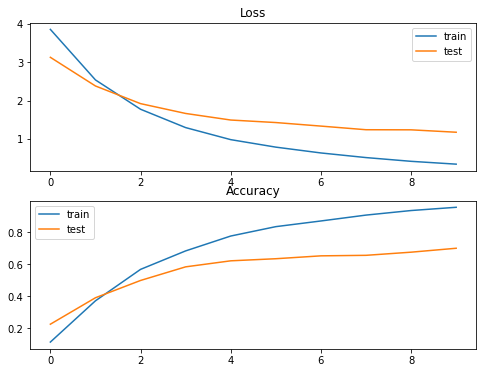

In [ ]:
summarize_model(history_1_10)

In [ ]:
history_1_20 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 54s 3s/step - loss: 3.7143 - accuracy: 0.1331 - val_loss: 2.9996 - val_accuracy: 0.2573
Epoch 2/20
10/10 [==============================] - 30s 3s/step - loss: 2.3899 - accuracy: 0.4145 - val_loss: 2.2184 - val_accuracy: 0.4397
Epoch 3/20
10/10 [==============================] - 30s 3s/step - loss: 1.6511 - accuracy: 0.5882 - val_loss: 1.8585 - val_accuracy: 0.4951
Epoch 4/20
10/10 [==============================] - 30s 3s/step - loss: 1.2063 - accuracy: 0.7137 - val_loss: 1.6167 - val_accuracy: 0.5847
Epoch 5/20
10/10 [==============================] - 30s 3s/step - loss: 0.9194 - accuracy: 0.7890 - val_loss: 1.4195 - val_accuracy: 0.6336
Epoch 6/20
10/10 [==============================] - 30s 3s/step - loss: 0.7135 - accuracy: 0.8476 - val_loss: 1.3357 - val_accuracy: 0.6384
Epoch 7/20
10/10 [==============================] - 30s 3s/step - loss: 0.5645 - accuracy: 0.8910 - val_loss: 1.2494 - val_accuracy: 0.6694
Epoch 8/20
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

20/20 [==============================] - 4s 196ms/step - loss: 1.1111 - accuracy: 0.7231


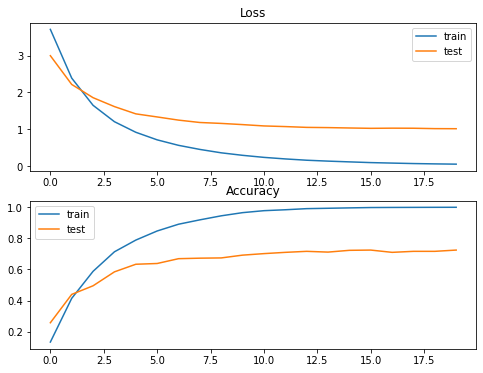

In [ ]:
summarize_model(history_1_20)

In [ ]:
history_1_50 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 54s 3s/step - loss: 3.6555 - accuracy: 0.1667 - val_loss: 2.9504 - val_accuracy: 0.2866
Epoch 2/50
10/10 [==============================] - 30s 3s/step - loss: 2.3297 - accuracy: 0.4390 - val_loss: 2.2556 - val_accuracy: 0.4300
Epoch 3/50
10/10 [==============================] - 30s 3s/step - loss: 1.5993 - accuracy: 0.6153 - val_loss: 1.8561 - val_accuracy: 0.5326
Epoch 4/50
10/10 [==============================] - 30s 3s/step - loss: 1.1648 - accuracy: 0.7255 - val_loss: 1.5928 - val_accuracy: 0.5912
Epoch 5/50
10/10 [==============================] - 30s 3s/step - loss: 0.8763 - accuracy: 0.8059 - val_loss: 1.4570 - val_accuracy: 0.6221
Epoch 6/50
10/10 [==============================] - 30s 3s/step - loss: 0.6887 - accuracy: 0.8555 - val_loss: 1.3694 - val_accuracy: 0.6515
Epoch 7/50
10/10 [==============================] - 30s 3s/step - loss: 0.5464 - accuracy: 0.8904 - val_loss: 1.3001 - val_accuracy: 0.6564
Epoch 8/50
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

20/20 [==============================] - 4s 195ms/step - loss: 1.1752 - accuracy: 0.7427


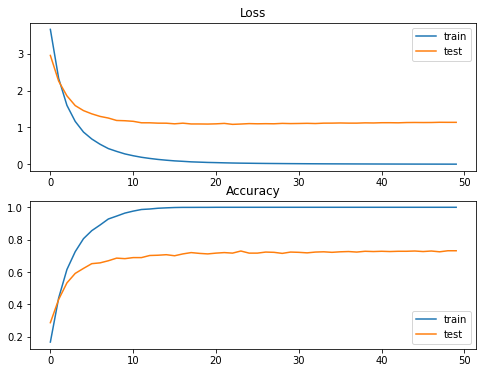

In [ ]:
summarize_model(history_1_50)

# **Model 2**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_2 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 50,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_2.add(pretrained_model)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(1024, activation='relu', input_dim = (224,224,3)))
output = model_2.add(Dense(50, activation='softmax'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 50)                51250     
                                                                 
Total params: 25,213,362
Trainable params: 1,625,650
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_2_10 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 35s 3s/step - loss: 3.7778 - accuracy: 0.1006 - val_loss: 3.2401 - val_accuracy: 0.2182
Epoch 2/10
10/10 [==============================] - 30s 3s/step - loss: 2.6238 - accuracy: 0.3559 - val_loss: 2.3084 - val_accuracy: 0.4153
Epoch 3/10
10/10 [==============================] - 30s 3s/step - loss: 1.7897 - accuracy: 0.5412 - val_loss: 1.8473 - val_accuracy: 0.5163
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 1.2735 - accuracy: 0.6698 - val_loss: 1.5567 - val_accuracy: 0.5912
Epoch 5/10
10/10 [==============================] - 30s 3s/step - loss: 0.9427 - accuracy: 0.7624 - val_loss: 1.4660 - val_accuracy: 0.6124
Epoch 6/10
10/10 [==============================] - 30s 3s/step - loss: 0.7008 - accuracy: 0.8316 - val_loss: 1.4185 - val_accuracy: 0.6189
Epoch 7/10
10/10 [==============================] - 30s 3s/step - loss: 0.5336 - accuracy: 0.8671 - val_loss: 1.2245 - val_accuracy: 0.6645
Epoch 8/10
10/10 [==

In [ ]:
testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

20/20 [==============================] - 4s 194ms/step - loss: 1.2102 - accuracy: 0.6987


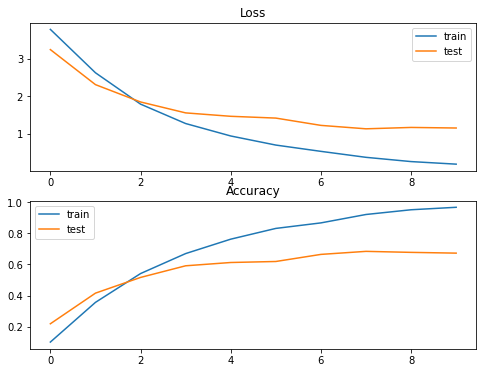

In [ ]:
summarize_model(history_2_10)

In [ ]:
history_2_20 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 54s 3s/step - loss: 3.7163 - accuracy: 0.1124 - val_loss: 3.1480 - val_accuracy: 0.2150
Epoch 2/20
10/10 [==============================] - 30s 3s/step - loss: 2.4467 - accuracy: 0.3861 - val_loss: 2.1898 - val_accuracy: 0.4365
Epoch 3/20
10/10 [==============================] - 30s 3s/step - loss: 1.6039 - accuracy: 0.5778 - val_loss: 1.7613 - val_accuracy: 0.5293
Epoch 4/20
10/10 [==============================] - 30s 3s/step - loss: 1.1118 - accuracy: 0.7157 - val_loss: 1.5065 - val_accuracy: 0.5977
Epoch 5/20
10/10 [==============================] - 30s 3s/step - loss: 0.8184 - accuracy: 0.7849 - val_loss: 1.3511 - val_accuracy: 0.6368
Epoch 6/20
10/10 [==============================] - 30s 3s/step - loss: 0.6117 - accuracy: 0.8422 - val_loss: 1.2917 - val_accuracy: 0.6629
Epoch 7/20
10/10 [==============================] - 30s 3s/step - loss: 0.4192 - accuracy: 0.9106 - val_loss: 1.1526 - val_accuracy: 0.6889
Epoch 8/20
10/10 [==

In [ ]:
testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

20/20 [==============================] - 4s 193ms/step - loss: 1.2034 - accuracy: 0.7524


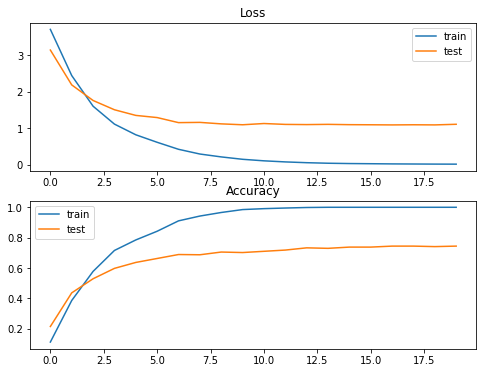

In [ ]:
summarize_model(history_2_20)

In [ ]:
history_2_50 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 54s 3s/step - loss: 3.5179 - accuracy: 0.1565 - val_loss: 2.8350 - val_accuracy: 0.2883
Epoch 2/50
10/10 [==============================] - 30s 3s/step - loss: 2.1815 - accuracy: 0.4580 - val_loss: 2.0948 - val_accuracy: 0.4739
Epoch 3/50
10/10 [==============================] - 30s 3s/step - loss: 1.4454 - accuracy: 0.6235 - val_loss: 1.7722 - val_accuracy: 0.5179
Epoch 4/50
10/10 [==============================] - 30s 3s/step - loss: 1.0158 - accuracy: 0.7392 - val_loss: 1.4914 - val_accuracy: 0.5912
Epoch 5/50
10/10 [==============================] - 30s 3s/step - loss: 0.7331 - accuracy: 0.8157 - val_loss: 1.3473 - val_accuracy: 0.6482
Epoch 6/50
10/10 [==============================] - 30s 3s/step - loss: 0.5462 - accuracy: 0.8653 - val_loss: 1.2569 - val_accuracy: 0.6743
Epoch 7/50
10/10 [==============================] - 30s 3s/step - loss: 0.3817 - accuracy: 0.9169 - val_loss: 1.2303 - val_accuracy: 0.6710
Epoch 8/50
10/10 [==

In [ ]:
testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

20/20 [==============================] - 4s 194ms/step - loss: 1.3466 - accuracy: 0.7476


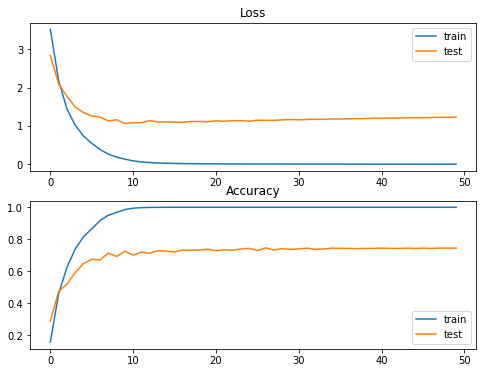

In [ ]:
summarize_model(history_2_50)